In [3]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/breast-cancer-wisconsin.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")
df = df.drop(columns=['id', 'Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Analysis

Text(0.5, 1.0, 'mean radius over 17.5 usually means malignant cancer')

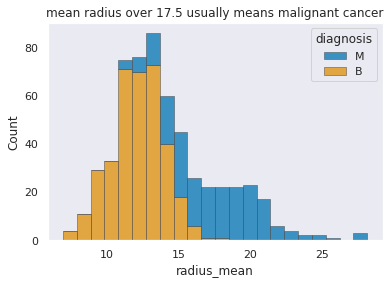

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.histplot(
    data=df,
    x="radius_mean", hue="diagnosis",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False
).set_title('mean radius over 17.5 usually means malignant cancer')

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

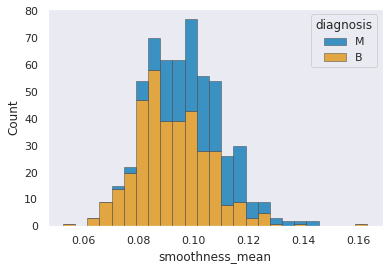

In [8]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.histplot(
    data=df,
    x="smoothness_mean", hue="diagnosis",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

<AxesSubplot:xlabel='radius_mean', ylabel='smoothness_mean'>

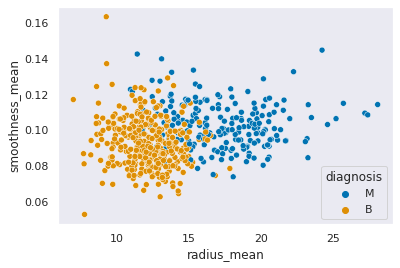

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.scatterplot(
    data=df, 
    x="radius_mean", 
    y="smoothness_mean", 
    hue="diagnosis")

* Este gráfico mostra algum padrão relevante? 

<AxesSubplot:xlabel='area_mean', ylabel='symmetry_mean'>

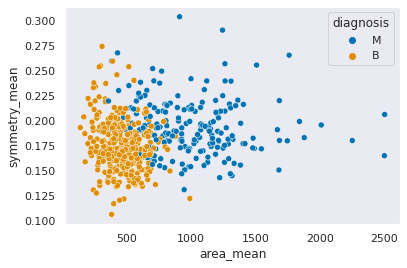

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.scatterplot(
    data=df, 
    x="area_mean", 
    y="symmetry_mean", 
    hue="diagnosis")

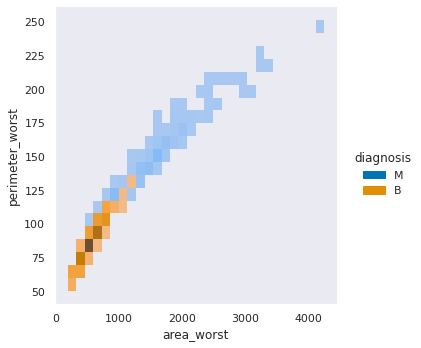

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.displot(
    data=df, 
    kind="hist", 
    height=5,
    x="area_worst", 
    y="perimeter_worst", 
    hue="diagnosis")

<AxesSubplot:xlabel='concavity_mean', ylabel='Count'>

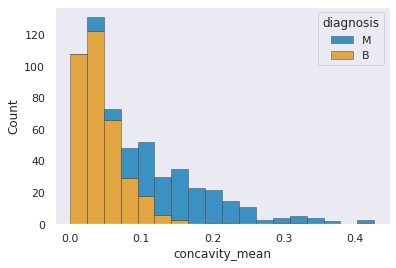

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="dark")
sns.set_palette("colorblind")

sns.histplot(
    data=df,
    x="concavity_mean", hue="diagnosis",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

## Separating dataset into training and validation datasets

Obs.: Se você estiver executando este script no Colab então não é necessário executar esta parte de separação dos arquivos. Eles já estão disponíveis no GitHub do projeto e é possível ler o conteúdo deles a partir dos outros scripts (pipelines).

In [14]:
from sklearn.model_selection import train_test_split

# no specific data processing will be done, that is repeated on every single pipeline for better maintenance
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:df.size-2], df['diagnosis'], test_size=0.1, random_state=4)

#training datasets
X_train.to_csv(path_or_buf="../../data/base_train.csv", header=True)
y_train.to_csv(path_or_buf="../../data/base_train_answer.csv", header=True)

#validating datasets
X_test.to_csv(path_or_buf="../../data/base_test.csv", header=True)
y_test.to_csv(path_or_buf="../../data/base_test_answer.csv", header=True)